## IA301 - Practical work on decision trees and ontologies

Membres du groupe : 
- Sami ALLANI
- Marie-Elisabeth CAMPO
- Samuel FLANDRIN
- Abdelkarim MOUSSAID
- Léa PAPILLON
- Louis-Gabriel POUILLOT

In [5]:
import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [6]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()

import pandas as pd
X = [[0, 0], [1, 1]]
y = [0, 1]

#Tree construction
clf = clf.fit(X, y)

# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

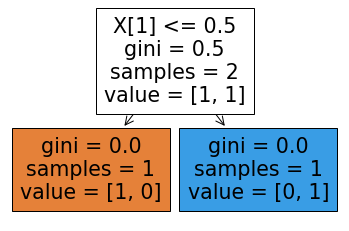

In [7]:
# display of the tree
tree.plot_tree(clf, filled=True)

### Question 1: What is the node test used to build the tree? 
The test is based on the value of the second attribute (X[1], with a threshold equal to 0.5). We can note that, in the case of this dataframe, we could have used the value of the first attribute instead of the second one, indifferently, since the datas are [0,0] for the class 0, and [1,1] for class 1 (we have would have had the same tree form and predicted results). Actually, it turns out that scikit-learn sometimes chooses to use the first attribute (when executing the construction of the tree several times).


### Explain the prediction for the new sample.

The predicted class for the entry [2,2] is '1'.

According to the tree, in order to predict the label of the new entry [2,2], we must (first) compare the value of the second attribute (X[1] = 2) to the threshold 0.5. Since 2 > 0.5, we follow the right branch of the tree and reach a leaf (in which every elements of the training set belonged to the class 1). We therefore assign the class '1', which is the value returned by scikit-learn.

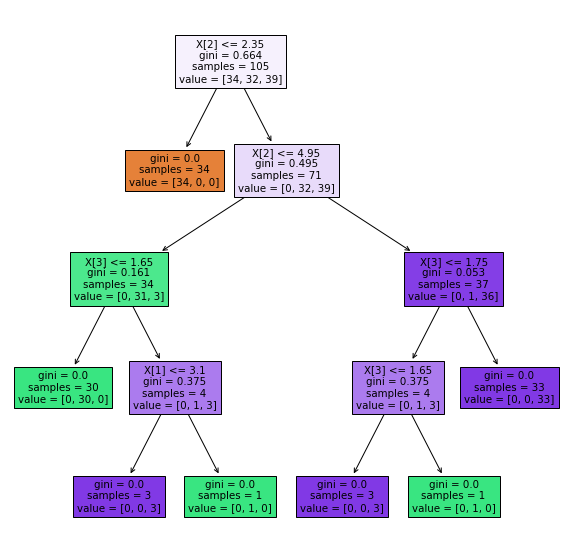

In [8]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [10]:
# prediction on the test set and computation of the accuracy
clf.predict(X_test)
clf.score(X_test, y_test)

0.9777777777777777

### Question 2: change the initial splitting of the dataset by reducing the size of the training set. 

In [16]:
import numpy as np

mean = []
train_set_list = [0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9] # tailles de train sets testées

for train_size in  train_set_list : 
    score = []
    
    for j in range(50) : # répétition sur un certain nombre d'itérations (moins d'aléa)
        X, y = iris.data, iris.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=1)
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)

        clf.predict(X_test)
        score.append(clf.score(X_test, y_test))
        
        #display
        #plt.figure(figsize=(5,5)) 
        #tree.plot_tree(clf,filled=True) 
        #plt.show()
        
    mean.append(np.array(score).mean())
    print("train_set : ", train_size, " - score test : ", np.array(score).mean())


train_set :  0.03  - score test :  0.797123287671233
train_set :  0.05  - score test :  0.8707692307692309
train_set :  0.1  - score test :  0.8896296296296294
train_set :  0.2  - score test :  0.9131666666666667
train_set :  0.3  - score test :  0.9539047619047618
train_set :  0.4  - score test :  0.9497777777777778
train_set :  0.5  - score test :  0.9434666666666669
train_set :  0.6  - score test :  0.9666666666666667
train_set :  0.7  - score test :  0.9555555555555556
train_set :  0.9  - score test :  1.0


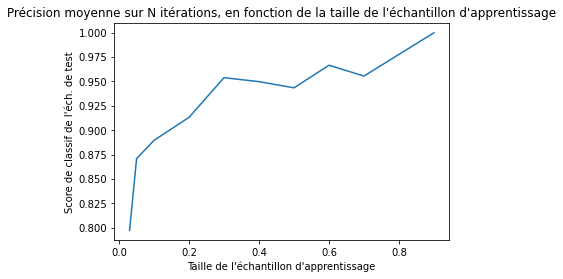

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.axes()

t = train_set_list
s = mean
ax.plot(t, s)
plt.title("Précision moyenne sur N itérations, en fonction de la taille de l'échantillon d'apprentissage")
plt.xlabel("Proportion de l'échantillon d'apprentissage")
plt.ylabel("Score de classif de l'éch. de test")
plt.show()

### What do you observe on the tree? on the accuracy?

On observe que : 
- Plus la taille de l'échantillon d'entrainement est importante : plus la dimension de l'arbre est importante (car il faut davantage de tests / comparaisons pour répartir parfaitement toutes les entrées).

- La précision augmente globalement avec la taille de l'échantillon d'entrainement (risque de surapprentissage).

### Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...).  Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time. Conclusion?

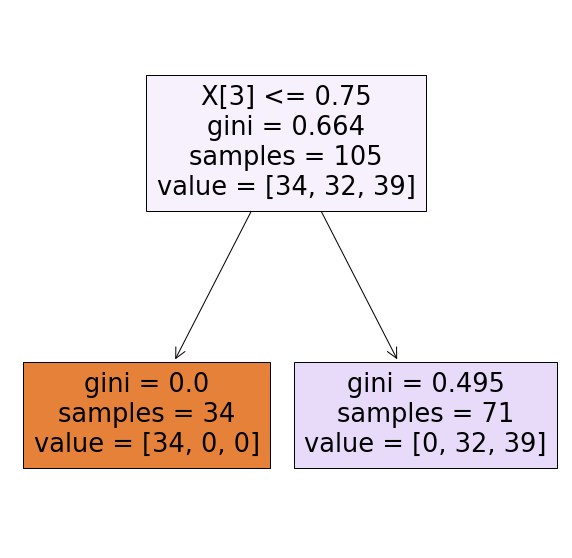

In [19]:
## Changing the max_depth parameter : 
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

Le paramètre "max_depth" permet de fixer la profondeur maximale de l'arbre de décision. On observe qu'en fixant ce paramètre, les feuilles obtenues ne sont pas pures (les échantillons d'apprentissage ne sont pas parfaitement répartis dans les différentes classes) : il y a plusieurs valeurs non nulles dans la liste "value" et le Gini est différent de 0. 

Plus on fixera une valeur faible, moins les feuilles auront de chance d'être pures. Ce paramètre permet de diminuer la complexité de l'arbre et de limiter le phénomène de sur-apprentissage (où l'arbre construit est trop proche des données d'apprentissages et généralise mal aux nouvelles données rencontrées). Il est potentiellement plus robuste aux erreurs dans les données d'apprentissage mais également potentiellement moins précis. Il faut trouver un compromis entre la précision et la capacité de généralisation du classifieur.

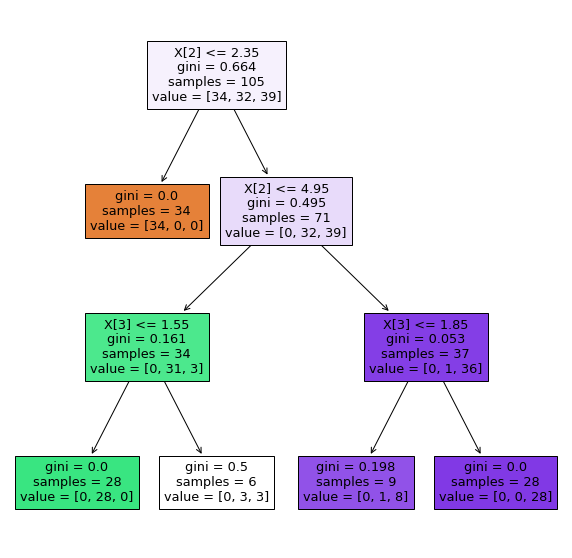

In [21]:
## Changing the min_samples_leaf parameter :
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

## Extrait de la documentation : 
##Decision-tree learners can create over-complex trees that do not generalise the data well. 
##This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required 
##at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Le paramètre "min_samples_leaf" permet de fixer un nombre minimum d'éléments dans les feuilles de l'arbre (classes finales) lors de la phase d'apprentissage : la construction d'une branche de l'arbre s'arrête lorsque la feuille contient un nombre d'éléments tel que l'étape suivante le ferait passer en-dessous d'un seuil. 

De la même manière que la profondeur maximale, il permet de limiter le surapprentissage. Il est moins arbitraire que le paramètre de profondeur maximale et permet d'avoir des branches de tailles différentes.

In [20]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]


### Question 4: By testing different trees (built with different parameter values), does a class appear as easier to classify than the others?

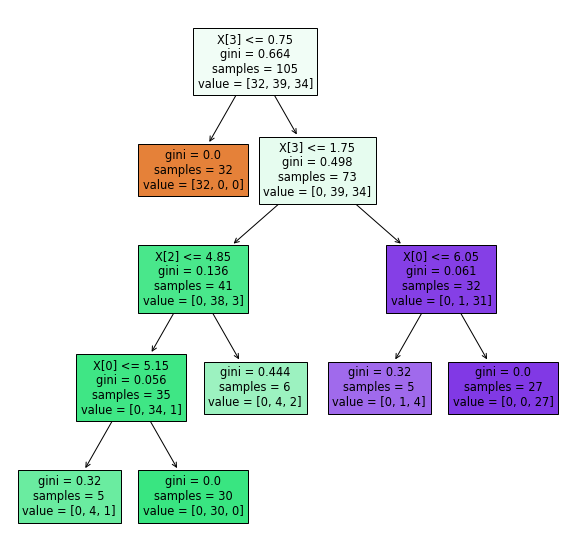

In [32]:
## Min_sample_leaf = 5
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)#, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

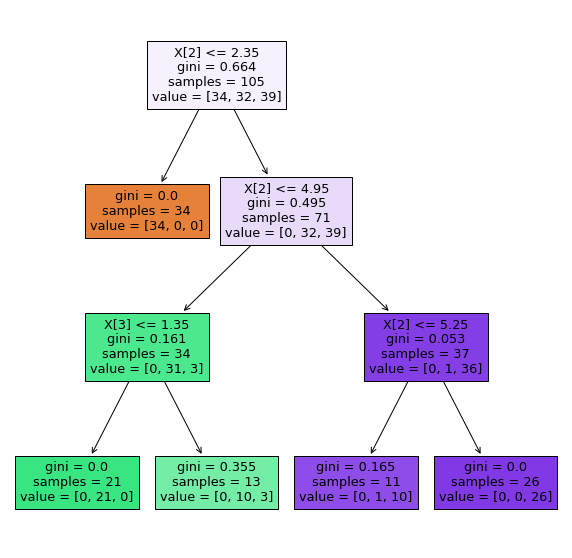

In [27]:
## Min_sample_leaf = 10
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 10)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

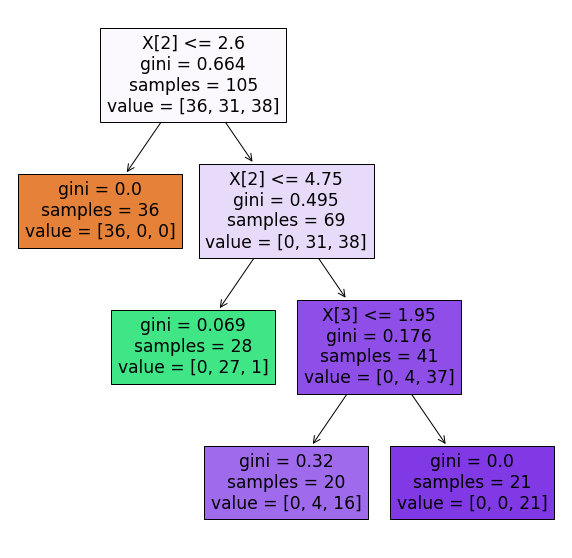

In [33]:
## Min_sample_leaf = 20
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)#, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

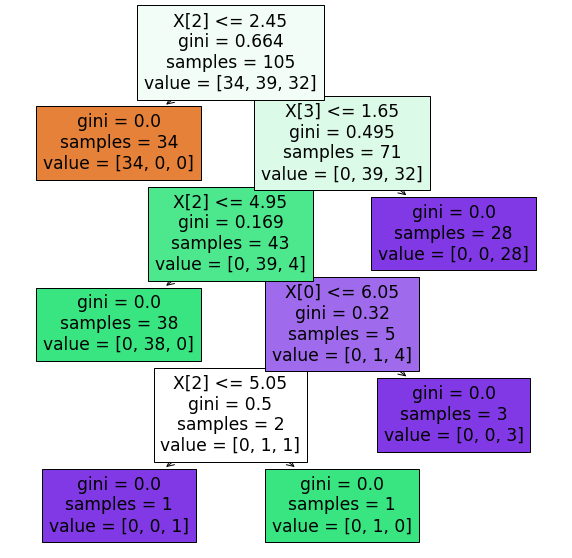

In [34]:
## Max_depth = 10
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)#, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

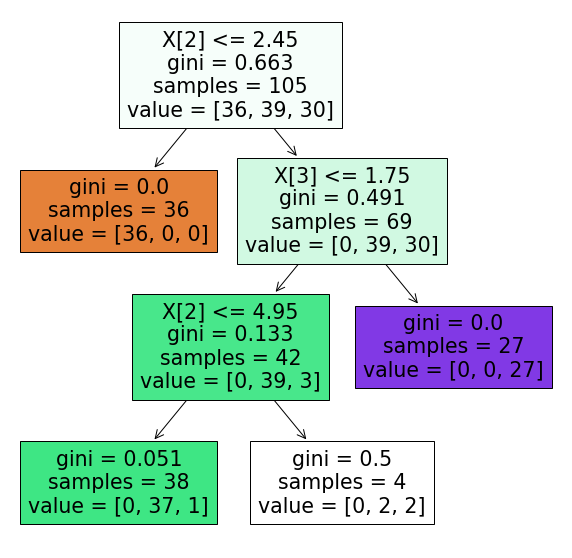

In [35]:
## Max_depth = 3
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)#, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

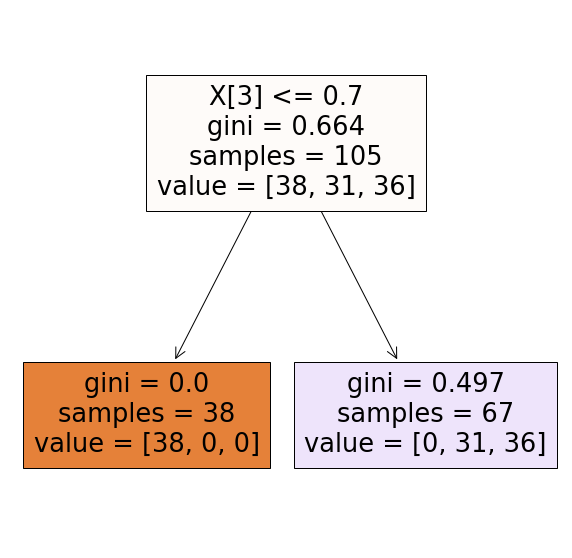

In [36]:
## Max_depth = 1
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)#, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

On observe que dans tous les arbres de décision générés précédemment, le premier test aboutit systématiquement à une première feuille contenant les éléments de la classe '0' (et ce, même en utilisant des données d'apprentissage aléatoires). On en déduit la classe 0 est plus simple que les autres à discriminer.

Les deux autres classes semblent plus difficiles à séparer : il faut à chaque fois plusieurs tests sur plusieurs variables pour parvenir à une répartition parfaite (quand on ne fixe pas de condition d'arrêt prématuré).